# 用液滴边缘自身做卷积核

把其中一个液滴的图像截取出来，减去均值作为卷积核。然后和原图像做卷积。利用**卷积核的同变性**，卷积核可以找到和图像中和自己纹理最相似的部分的特点，而且相似度越高，得到的响应值越大**。


In [1]:
import cv2 as cv
import numpy as np
# from scipy import ndimage
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kernel_3x3 = np.array(
        [[-1, -1, -1],
         [-1, 8, -1],
         [-1, -1, -1]]
)
kernel_5x5 = np.array(
        [[-1, -1, -1, -1, -1],
         [-1, 1, 2, 1, -1],
         [-1, 2, 4, 2, -1],
         [-1, 1, 2, 1, -1],
         [-1, -1, -1, -1, -1]]
)

In [3]:
# os.chdir('..')
# print(os.getcwd())
image = cv.imread('data/600V350Q401/600V350Q401_0017.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

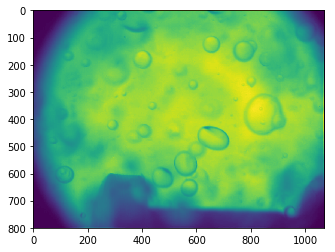

In [4]:
plt.imshow(image)

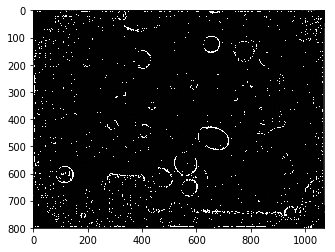

In [6]:
# 灰度图
# img = cv.imread("0.jpg", 0)
# “convolve”大概翻译为卷积的意思吧
# 通过scipy的ndimage实现
# k3 = ndimage.convolve(image, kernel_3x3)
# k5 = ndimage.convolve(image, kernel_5x5)
blurred11 = cv.GaussianBlur(image, (11,11), 0)
g_hpf11 = image - blurred11
# cv.imshow("3x3", k3)
# cv.imshow("5x5", k5)
plt.imshow(g_hpf11,cmap='gray')
# cv.imshow("gw('img',img)_hpf", g_hpf)
# cv.waitKey()
# cv.destroyAllWindows()

In [30]:
cv.imwrite('hpf11_image.jpg',g_hpf11)

True

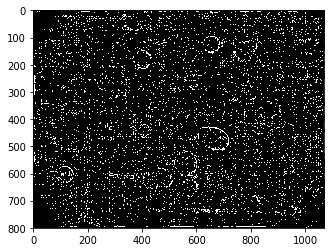

In [7]:
# 灰度图
# img = cv.imread("0.jpg", 0)
# “convolve”大概翻译为卷积的意思吧
# 通过scipy的ndimage实现
# k3 = ndimage.convolve(image, kernel_3x3)
# k5 = ndimage.convolve(image, kernel_5x5)
blurred5 = cv.GaussianBlur(image, (5,5), 0)
g_hpf5 = image - blurred5
# cv.imshow("3x3", k3)
# cv.imshow("5x5", k5)
plt.imshow(g_hpf5,cmap='gray')
# cv.imshow("gw('img',img)_hpf", g_hpf)
# cv.waitKey()
# cv.destroyAllWindows()

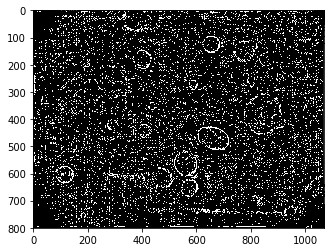

In [8]:
# 灰度图
# img = cv.imread("0.jpg", 0)
# “convolve”大概翻译为卷积的意思吧
# 通过scipy的ndimage实现
# k3 = ndimage.convolve(image, kernel_3x3)
# k5 = ndimage.convolve(image, kernel_5x5)
blurred7 = cv.GaussianBlur(image, (7,7), 0)
g_hpf7 = image - blurred7
# cv.imshow("3x3", k3)
# cv.imshow("5x5", k5)
plt.imshow(g_hpf7,cmap='gray')
# cv.imshow("gw('img',img)_hpf", g_hpf)
# cv.waitKey()
# cv.destroyAllWindows()

In [15]:
class VConvolutionFilter(object):
    def __init__(self, kernel):
        self._kernel = kernel
    def apply(self, src, dst):
        """应用滤波器"""
        # 第二个参数 -1，指的是目标图跟原图具有同样的通道深度（per-channel depth）
        cv.filter2D(src, -1, self._kernel, dst)
class SharpenFilter(VConvolutionFilter):
    """锐化"""
    def __init__(self):
        # 注意到模板权重总和为1。这种情况下，图像的总体亮度不变。
        kernel = np.array(
                [[-1, -1, -1],
                 [-1, 9, -1],
                 [-1, -1, -1]]
        )
        VConvolutionFilter.__init__(self, kernel)

In [23]:
image.shape

(800, 1072)

In [24]:
laplasian_sharpen_image = np.zeros(image.shape)

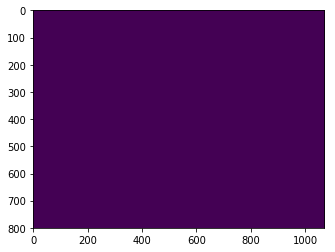

In [26]:
sf = SharpenFilter()
sf.apply(laplasian_sharpen_image, image)

plt.imshow(laplasian_sharpen_image)

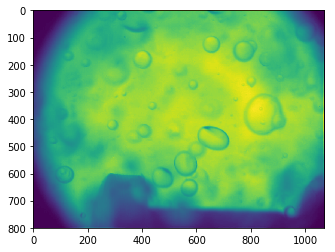

In [27]:
plt.imshow(image)

In [31]:
kernel = np.array(
        [[-1, -1, -1],
         [-1, 9, -1],
         [-1, -1, -1]])
laplasian_sharpen_image = cv.filter2D(image, -1, kernel)

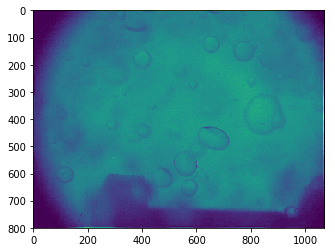

In [32]:
plt.imshow(laplasian_sharpen_image)

In [33]:
cv.imwrite('laplasian_sharpen_image.jpg',laplasian_sharpen_image)

True